# Multiple linear regression.

Unlike the simple linear regression model, the multiple linear regression model is defined as any linear regression model with at least two explanatory variables. But what do we do when we have several variables? This is what we will see in this chapter. And you will finally be able to measure all the power of linear regression despite its simplicity!


## Variables studied

First of all, we will load our dataset. This is a fake Dataset for the example. 

In [1]:
#MAIN
import numpy as np
import pandas as pd
inputfile = "../data/data_homes.csv"
df=pd.read_csv(inputfile,delimiter=",")


# Cleaning steps
################
# Checking how many rows of each attribute are NaN
df.isna().sum()

# drop columns
dropcolmns=['classified.type','classified.condition.isNewlyBuilt','classified.transactionType','customer.id','classified.visualisationOption','classified.id','screen.language','screen.name','customer.networkInfo.id','customer.networkInfo.name',\
            'customer.groupInfo.name','customer.groupInfo.id','user.loginStatus',\
            'Unnamed: 0','user.personal.language','user.id',\
            'customer.name','customer.family']
df = df.drop(columns=dropcolmns)
#df.isna().sum()
#print(df.shape)
#drop duplicates
df=df.drop_duplicates()
#print(df.shape)
#df.head()

# drop rows "fromprice - toprice" these are 'housegroups'
df=df[df['classified.price'].str.find('-') == -1]
# drop bad rows
df=df[df['classified.kitchen.type'] != 'classified.kitchen.type']
df=df[df['classified.building.condition'] != 'classified.building.condition']
df=df[df['classified.price'] != 'no price']

# get ordinals and categoricals
'''
for i in df.columns:
    if len(df[i].unique()) < 100 :
        print(i,": ",len(df[i].unique()),df[i].unique())
'''        
# transformm ordinals and categoricals        
#categoricals
#############
#classified.type :  4 ['house' 'classified.type' 'apartment' nan]
#classified.subtype :  22 ['apartment block' 'classified.subtype' 'apartment' 'bungalow' 'castle'
            # 'chalet' 'country cottage' 'duplex' 'exceptional property' 'farmhouse'
            # 'flat studio' 'ground floor' 'house' 'villa' 'mixed use building'
            # 'town house' 'mansion' 'manor house' 'other property' nan
            # 'classified details' 'penthouse']
#classified.type :  8 ['house' 'en' 'classified.type' 'apartment' nan 'apartment group' 'en;;' 'house group']
#classified.energy.heatingType :  8 ['gas' nan 'fueloil' 'electric' 'classified.energy.heatingType' 'pellet'
# 'wood' 'carbon']
#other type
################
#classified.kitchen.type :  10 ['semi equipped' 'installed' nan 'usa installed' 'hyper equipped'
# 'not installed' 'usa hyper equipped' 'classified.kitchen.type'
# 'usa semi equipped' 'usa uninstalled']
#classified.building.condition :  8 ['to be done up' 'as new' 'to renovate' 'good' nan
# 'classified.building.condition' 'just renovated' 'to restore']
df['classified.kitchen.type'] = df['classified.kitchen.type'].replace('not installed' ,1)
df['classified.kitchen.type'] = df['classified.kitchen.type'].replace('installed' ,2)
df['classified.kitchen.type'] = df['classified.kitchen.type'].replace('semi equipped' ,3)
df['classified.kitchen.type'] = df['classified.kitchen.type'].replace('hyper equipped' ,4)
df['classified.kitchen.type'] = df['classified.kitchen.type'].replace('usa uninstalled' ,1)
df['classified.kitchen.type'] = df['classified.kitchen.type'].replace('usa installed' ,2)
df['classified.kitchen.type'] = df['classified.kitchen.type'].replace('usa semi equipped' ,3)
df['classified.kitchen.type'] = df['classified.kitchen.type'].replace('usa hyper equipped' ,4)

df['classified.building.condition'] = df['classified.building.condition'].replace('to renovate',1)
df['classified.building.condition'] = df['classified.building.condition'].replace('to restore',2)
df['classified.building.condition'] = df['classified.building.condition'].replace('to be done up',3)
df['classified.building.condition'] = df['classified.building.condition'].replace('good',5)
df['classified.building.condition'] = df['classified.building.condition'].replace('just renovated',6)
df['classified.building.condition'] = df['classified.building.condition'].replace('as new',7)



# set 0
################
#----------- replace nan/None
flds=[
      "classified.outdoor.garden.surface",
      "classified.parking.parkingSpaceCount.indoor",
      "classified.parking.parkingSpaceCount.outdoor",
      "classified.bedroom.count"
     ]
for fld in flds:
    df[fld]=df[fld].replace(np.nan, 0)
    df[fld]=df[fld].replace('None', 0)

#----------- replace nan,False,True
flds=[
      "classified.atticExists",
      "classified.basementExists",
      "classified.outdoor.terrace.exists",
      "classified.specificities.SME.office.exists",
      "classified.wellnessEquipment.hasSwimmingPool"
        ]
for fld in flds:
    df[fld]=df[fld].replace(np.nan, 0)
    df[fld]=df[fld].replace('false', 0)
    df[fld]=df[fld].replace('true', 1)
#print(df.columns)    

#print('###########################################################')
# get the nan field of a column
#df[df['classified.land.surface'].isna() == True]
#df['classified.land.surface']=df['classified.land.surface'].replace(np.nan,9999)

df.head(20)
df=df.dropna()
#df.info()
df['classified.building.constructionYear'].unique()

df['classified.price'] = df['classified.price'].astype(float)
df['classified.building.constructionYear'] = df['classified.building.constructionYear'].astype(float)
df['classified.certificates.primaryEnergyConsumptionLevel'] = df['classified.certificates.primaryEnergyConsumptionLevel'].astype(float)
df['classified.bedroom.count'] = df['classified.bedroom.count'].astype(np.int64)
df['classified.land.surface'] = df['classified.land.surface'].astype(float)
df['classified.outdoor.garden.surface'] = df['classified.outdoor.garden.surface'].astype(float)
df['classified.parking.parkingSpaceCount.indoor'] = df['classified.parking.parkingSpaceCount.indoor'].astype(np.int64)
df['classified.parking.parkingSpaceCount.outdoor'] = df['classified.parking.parkingSpaceCount.outdoor'].astype(np.int64)
dum=pd.get_dummies(df['classified.energy.heatingType'])
df=df.join(dum)
df=df.drop(columns=['classified.energy.heatingType'])
df=df.drop(columns=['classified.subtype'])
# Save cleaned data for model
df.to_csv("../data/data_homes_cleaned.csv",index=False) 

#print(df.isna().sum())
#print(df.info())
df.head(20)
#####################################################################################################################
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# read data
#
df = pd.read_csv("../data/data_homes_cleaned.csv")
'''
df=df[['classified.price', 'classified.kitchen.type',
       'classified.building.constructionYear', 'classified.building.condition',
       'classified.certificates.primaryEnergyConsumptionLevel',
       'classified.bedroom.count']]

df=df[['classified.land.surface',
 'classified.parking.parkingSpaceCount.indoor',
 'classified.price',
 'classified.bedroom.count']]
'''
# prepare
 
#
X=df.drop(columns=['classified.price'])
y=df['classified.price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, train_size=0.8)

from sklearn.linear_model import LinearRegression
#X_train=X_train.reshape(-1, 1)
#y_train=y_train.reshape(-1, 1)
lrg=LinearRegression().fit(X_train,y_train)
print(lrg.score(X_test,y_test))
X.head()


0.2859640182772275


,classified.zip,classified.kitchen.type,classified.building.constructionYear,classified.building.condition,classified.certificates.primaryEnergyConsumptionLevel,classified.bedroom.count,classified.land.surface,classified.atticExists,classified.basementExists,classified.outdoor.garden.surface,...,classified.specificities.SME.office.exists,classified.wellnessEquipment.hasSwimmingPool,classified.parking.parkingSpaceCount.indoor,classified.parking.parkingSpaceCount.outdoor,carbon,electric,fueloil,gas,pellet,wood
0,9300,3.0,1964.0,3.0,755.0,4,200.0,0,0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,1070,3.0,1925.0,7.0,311.0,1,0.0,0,0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,1070,4.0,1930.0,5.0,275.0,5,100.0,0,0,45.0,...,0,0,0,0,0,0,0,1,0,0
3,1070,2.0,1899.0,5.0,288.0,1,90.0,0,0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,1070,2.0,1970.0,5.0,424.0,5,131.0,0,1,40.0,...,1,0,1,1,0,0,0,1,0,0


In [2]:
X.columns


Index(['classified.zip', 'classified.kitchen.type',
       'classified.building.constructionYear', 'classified.building.condition',
       'classified.certificates.primaryEnergyConsumptionLevel',
       'classified.bedroom.count', 'classified.land.surface',
       'classified.atticExists', 'classified.basementExists',
       'classified.outdoor.garden.surface',
       'classified.outdoor.terrace.exists',
       'classified.specificities.SME.office.exists',
       'classified.wellnessEquipment.hasSwimmingPool',
       'classified.parking.parkingSpaceCount.indoor',
       'classified.parking.parkingSpaceCount.outdoor', 'carbon', 'electric',
       'fueloil', 'gas', 'pellet', 'wood'],
      dtype='object')

In [32]:
X.columns

Index(['classified.zip', 'classified.kitchen.type',
       'classified.building.constructionYear', 'classified.building.condition',
       'classified.certificates.primaryEnergyConsumptionLevel',
       'classified.bedroom.count', 'classified.land.surface',
       'classified.atticExists', 'classified.basementExists',
       'classified.outdoor.garden.surface',
       'classified.outdoor.terrace.exists',
       'classified.specificities.SME.office.exists',
       'classified.wellnessEquipment.hasSwimmingPool',
       'classified.parking.parkingSpaceCount.indoor',
       'classified.parking.parkingSpaceCount.outdoor', 'carbon', 'electric',
       'fueloil', 'gas', 'pellet', 'wood'],
      dtype='object')

In [26]:

import numpy as np
import pandas as pd
inputfile = "../data/data_homes.csv"
df=pd.read_csv(inputfile,delimiter=",")






# Cleaning steps
################
# Checking how many rows of each attribute are NaN
df.isna().sum()

# drop columns
dropcolmns=['classified.type','classified.condition.isNewlyBuilt','classified.transactionType','customer.id','classified.visualisationOption','classified.id','screen.language','screen.name','customer.networkInfo.id','customer.networkInfo.name',\
            'customer.groupInfo.name','customer.groupInfo.id','user.loginStatus',\
            'Unnamed: 0','user.personal.language','user.id',\
            'customer.name','customer.family']
df = df.drop(columns=dropcolmns)
#df.isna().sum()
#print(df.shape)
#drop duplicates
df=df.drop_duplicates()
#print(df.shape)
#df.head()

# drop rows "fromprice - toprice" these are 'housegroups'
df=df[df['classified.price'].str.find('-') == -1]
# drop bad rows
df=df[df['classified.kitchen.type'] != 'classified.kitchen.type']
df=df[df['classified.building.condition'] != 'classified.building.condition']
df=df[df['classified.price'] != 'no price']

# get ordinals and categoricals
'''
for i in df.columns:
    if len(df[i].unique()) < 100 :
        print(i,": ",len(df[i].unique()),df[i].unique())
'''        
# transformm ordinals and categoricals        
#categoricals
#############
#classified.type :  4 ['house' 'classified.type' 'apartment' nan]
#classified.subtype :  22 ['apartment block' 'classified.subtype' 'apartment' 'bungalow' 'castle'
            # 'chalet' 'country cottage' 'duplex' 'exceptional property' 'farmhouse'
            # 'flat studio' 'ground floor' 'house' 'villa' 'mixed use building'
            # 'town house' 'mansion' 'manor house' 'other property' nan
            # 'classified details' 'penthouse']
#classified.type :  8 ['house' 'en' 'classified.type' 'apartment' nan 'apartment group' 'en;;' 'house group']
#classified.energy.heatingType :  8 ['gas' nan 'fueloil' 'electric' 'classified.energy.heatingType' 'pellet'
# 'wood' 'carbon']
#other type
################
#classified.kitchen.type :  10 ['semi equipped' 'installed' nan 'usa installed' 'hyper equipped'
# 'not installed' 'usa hyper equipped' 'classified.kitchen.type'
# 'usa semi equipped' 'usa uninstalled']
#classified.building.condition :  8 ['to be done up' 'as new' 'to renovate' 'good' nan
# 'classified.building.condition' 'just renovated' 'to restore']
df['classified.kitchen.type'] = df['classified.kitchen.type'].replace('not installed' ,1)
df['classified.kitchen.type'] = df['classified.kitchen.type'].replace('installed' ,2)
df['classified.kitchen.type'] = df['classified.kitchen.type'].replace('semi equipped' ,3)
df['classified.kitchen.type'] = df['classified.kitchen.type'].replace('hyper equipped' ,4)
df['classified.kitchen.type'] = df['classified.kitchen.type'].replace('usa uninstalled' ,1)
df['classified.kitchen.type'] = df['classified.kitchen.type'].replace('usa installed' ,2)
df['classified.kitchen.type'] = df['classified.kitchen.type'].replace('usa semi equipped' ,3)
df['classified.kitchen.type'] = df['classified.kitchen.type'].replace('usa hyper equipped' ,4)

df['classified.building.condition'] = df['classified.building.condition'].replace('to renovate',1)
df['classified.building.condition'] = df['classified.building.condition'].replace('to restore',2)
df['classified.building.condition'] = df['classified.building.condition'].replace('to be done up',3)
df['classified.building.condition'] = df['classified.building.condition'].replace('good',5)
df['classified.building.condition'] = df['classified.building.condition'].replace('just renovated',6)
df['classified.building.condition'] = df['classified.building.condition'].replace('as new',7)



# set 0
################
#----------- replace nan/None
flds=[
      "classified.outdoor.garden.surface",
      "classified.parking.parkingSpaceCount.indoor",
      "classified.parking.parkingSpaceCount.outdoor",
      "classified.bedroom.count"
     ]
for fld in flds:
    df[fld]=df[fld].replace(np.nan, 0)
    df[fld]=df[fld].replace('None', 0)

#----------- replace nan,False,True
flds=[
      "classified.atticExists",
      "classified.basementExists",
      "classified.outdoor.terrace.exists",
      "classified.specificities.SME.office.exists",
      "classified.wellnessEquipment.hasSwimmingPool"
        ]
for fld in flds:
    df[fld]=df[fld].replace(np.nan, 0)
    df[fld]=df[fld].replace('false', 0)
    df[fld]=df[fld].replace('true', 1)
#print(df.columns)    

#print('###########################################################')
# get the nan field of a column
#df[df['classified.land.surface'].isna() == True]
#df['classified.land.surface']=df['classified.land.surface'].replace(np.nan,9999)

df.head(20)
df=df.dropna()
#df.info()
df['classified.building.constructionYear'].unique()

df['classified.price'] = df['classified.price'].astype(float)
df['classified.building.constructionYear'] = df['classified.building.constructionYear'].astype(float)
df['classified.certificates.primaryEnergyConsumptionLevel'] = df['classified.certificates.primaryEnergyConsumptionLevel'].astype(float)
df['classified.bedroom.count'] = df['classified.bedroom.count'].astype(np.int64)
df['classified.land.surface'] = df['classified.land.surface'].astype(float)
df['classified.outdoor.garden.surface'] = df['classified.outdoor.garden.surface'].astype(float)
df['classified.parking.parkingSpaceCount.indoor'] = df['classified.parking.parkingSpaceCount.indoor'].astype(np.int64)
df['classified.parking.parkingSpaceCount.outdoor'] = df['classified.parking.parkingSpaceCount.outdoor'].astype(np.int64)
dum=pd.get_dummies(df['classified.energy.heatingType'])
df=df.join(dum)
df=df.drop(columns=['classified.energy.heatingType'])
df=df.drop(columns=['classified.subtype'])
# Save cleaned data for model
df.to_csv("../data/data_homes_cleaned.csv",index=False) 

#print(df.isna().sum())
#print(df.info())
df.head(20)
#####################################################################################################################
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# read data
#
df = pd.read_csv("../data/data_homes_cleaned.csv")
'''
df=df[['classified.price', 'classified.kitchen.type',
       'classified.building.constructionYear', 'classified.building.condition',
       'classified.certificates.primaryEnergyConsumptionLevel',
       'classified.bedroom.count']]

df=df[['classified.land.surface',
 'classified.parking.parkingSpaceCount.indoor',
 'classified.price',
 'classified.bedroom.count']]
'''
# prepare
################################
 

######################################
z=list(df.columns)
z=z[1:-1]
from itertools import combinations
LEVEL=2
comb = combinations(z, LEVEL)

best=0
#print("anz",list(comb))
for i in list(comb):
    qq=df
    #print(best)
    selectclmns=(list(i))     
    selectclmns.append('max_error')
    qq=qq[selectclmns]
    #print("@@@",x[0,1],best,qq.columns)
    x=go(qq)
    if  x  > best:
        best=x
        print(x)
        print(qq.columns)
        print("------------------------")
print("#######FINISHED")

################################
#
def go(df):
    X=df.drop(columns=['classified.price'])
    y=df['classified.price']

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, train_size=0.8)

    from sklearn.linear_model import LinearRegression
    #X_train=X_train.reshape(-1, 1)
    #y_train=y_train.reshape(-1, 1)
    lrg=LinearRegression().fit(X_train,y_train)
    #print(lrg.score(X_test,y_test))
    return lrg.score


KeyError: "['max_error'] not in index"

In [19]:
z=list(df.columns)
z=z[1:-1]
from itertools import combinations
LEVEL=2
comb = combinations(z, LEVEL)
print(comb)
best=0
#print("anz",list(comb))
for i in list(comb):
    qq=df
    #print(best)
    selectclmns=(list(i))     
    #selectclmns.append('max_error')
    qq=qq[selectclmns]
    #print("@@@",x[0,1],best,qq.columns)
    #print(qq.columns)
    x=go(qq)
    if  x  > best:
        best=x
        print(x)
        print(qq.columns)
        print("------------------------")
print("#######FINISHED")

   classified.zip  classified.kitchen.type
0            9300                      3.0
1            1070                      3.0
2            1070                      4.0
3            1070                      2.0
4            1070                      2.0


KeyError: "['classified.price'] not found in axis"

In [24]:

#
def go(df):
    #print(df.head())
    X=df.drop(columns=['classified.price'])
    y=df['classified.price']

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, train_size=0.8)

    from sklearn.linear_model import LinearRegression
    #X_train=X_train.reshape(-1, 1)
    #y_train=y_train.reshape(-1, 1)
    lrg=LinearRegression().fit(X_train,y_train)
    #print(lrg.score(X_test,y_test))
    return lrg.score(X_test,y_test)
#####################################
best=0
for  LEVEL in range(2,15):
    a=df.drop(columns=['classified.price'])
    z=list(a.columns)
    z=z[1:-1]
    from itertools import combinations
    #LEVEL=2
    comb = combinations(z, LEVEL)
    print(comb)
    #best=0
    #print("anz",list(comb))
    for i in list(comb):
        qq=df
        #print(best)
        selectclmns=(list(i))     
        selectclmns.append('classified.price')
        qq=qq[selectclmns]
        #print("@@@",x[0,1],best,qq.columns)
        #print(qq.columns)
        x=go(qq)
        if  x  > best:
            best=x
            print(x)
            print(qq.columns)
            print("------------------------")
    print("#######FINISHED")

################################



0.04440451153333169
Index(['classified.kitchen.type', 'classified.building.constructionYear',
       'classified.price'],
      dtype='object')
------------------------
0.06858841883648858
Index(['classified.kitchen.type', 'classified.building.condition',
       'classified.price'],
      dtype='object')
------------------------
0.2017396588384358
Index(['classified.kitchen.type', 'classified.bedroom.count',
       'classified.price'],
      dtype='object')
------------------------
0.21132468652734882
Index(['classified.building.condition', 'classified.bedroom.count',
       'classified.price'],
      dtype='object')
------------------------
#######FINISHED
0.22294879133659762
Index(['classified.kitchen.type', 'classified.building.condition',
       'classified.bedroom.count', 'classified.price'],
      dtype='object')
------------------------
0.22451934444061727
Index(['classified.building.constructionYear', 'classified.building.condition',
       'classified.bedroom.count', 'classifi

In [254]:
df = pd.read_csv("../data/data_homes_cleaned.csv")



a=df.corr()
#print(a.columns)
t=[]
for k in a.columns:
    z=a[a[k] > 0.4]
    zz=z[z[k] < 1]
    t.append(zz.index.tolist())
    #print(t)


flat_list = [item for sublist in t for item in sublist]
flat_list

['classified.land.surface',
 'classified.parking.parkingSpaceCount.indoor',
 'classified.price',
 'classified.bedroom.count']

In [257]:

a=df.corr()
#print(a.columns)
a

,classified.land.surface,classified.parking.parkingSpaceCount.indoor,classified.price,classified.bedroom.count
classified.land.surface,1.000000,0.103427,0.495253,0.134892
classified.parking.parkingSpaceCount.indoor,0.103427,1.000000,0.228737,0.542115
classified.price,0.495253,0.228737,1.000000,0.392490
classified.bedroom.count,0.134892,0.542115,0.392490,1.000000


0.2859640182772275


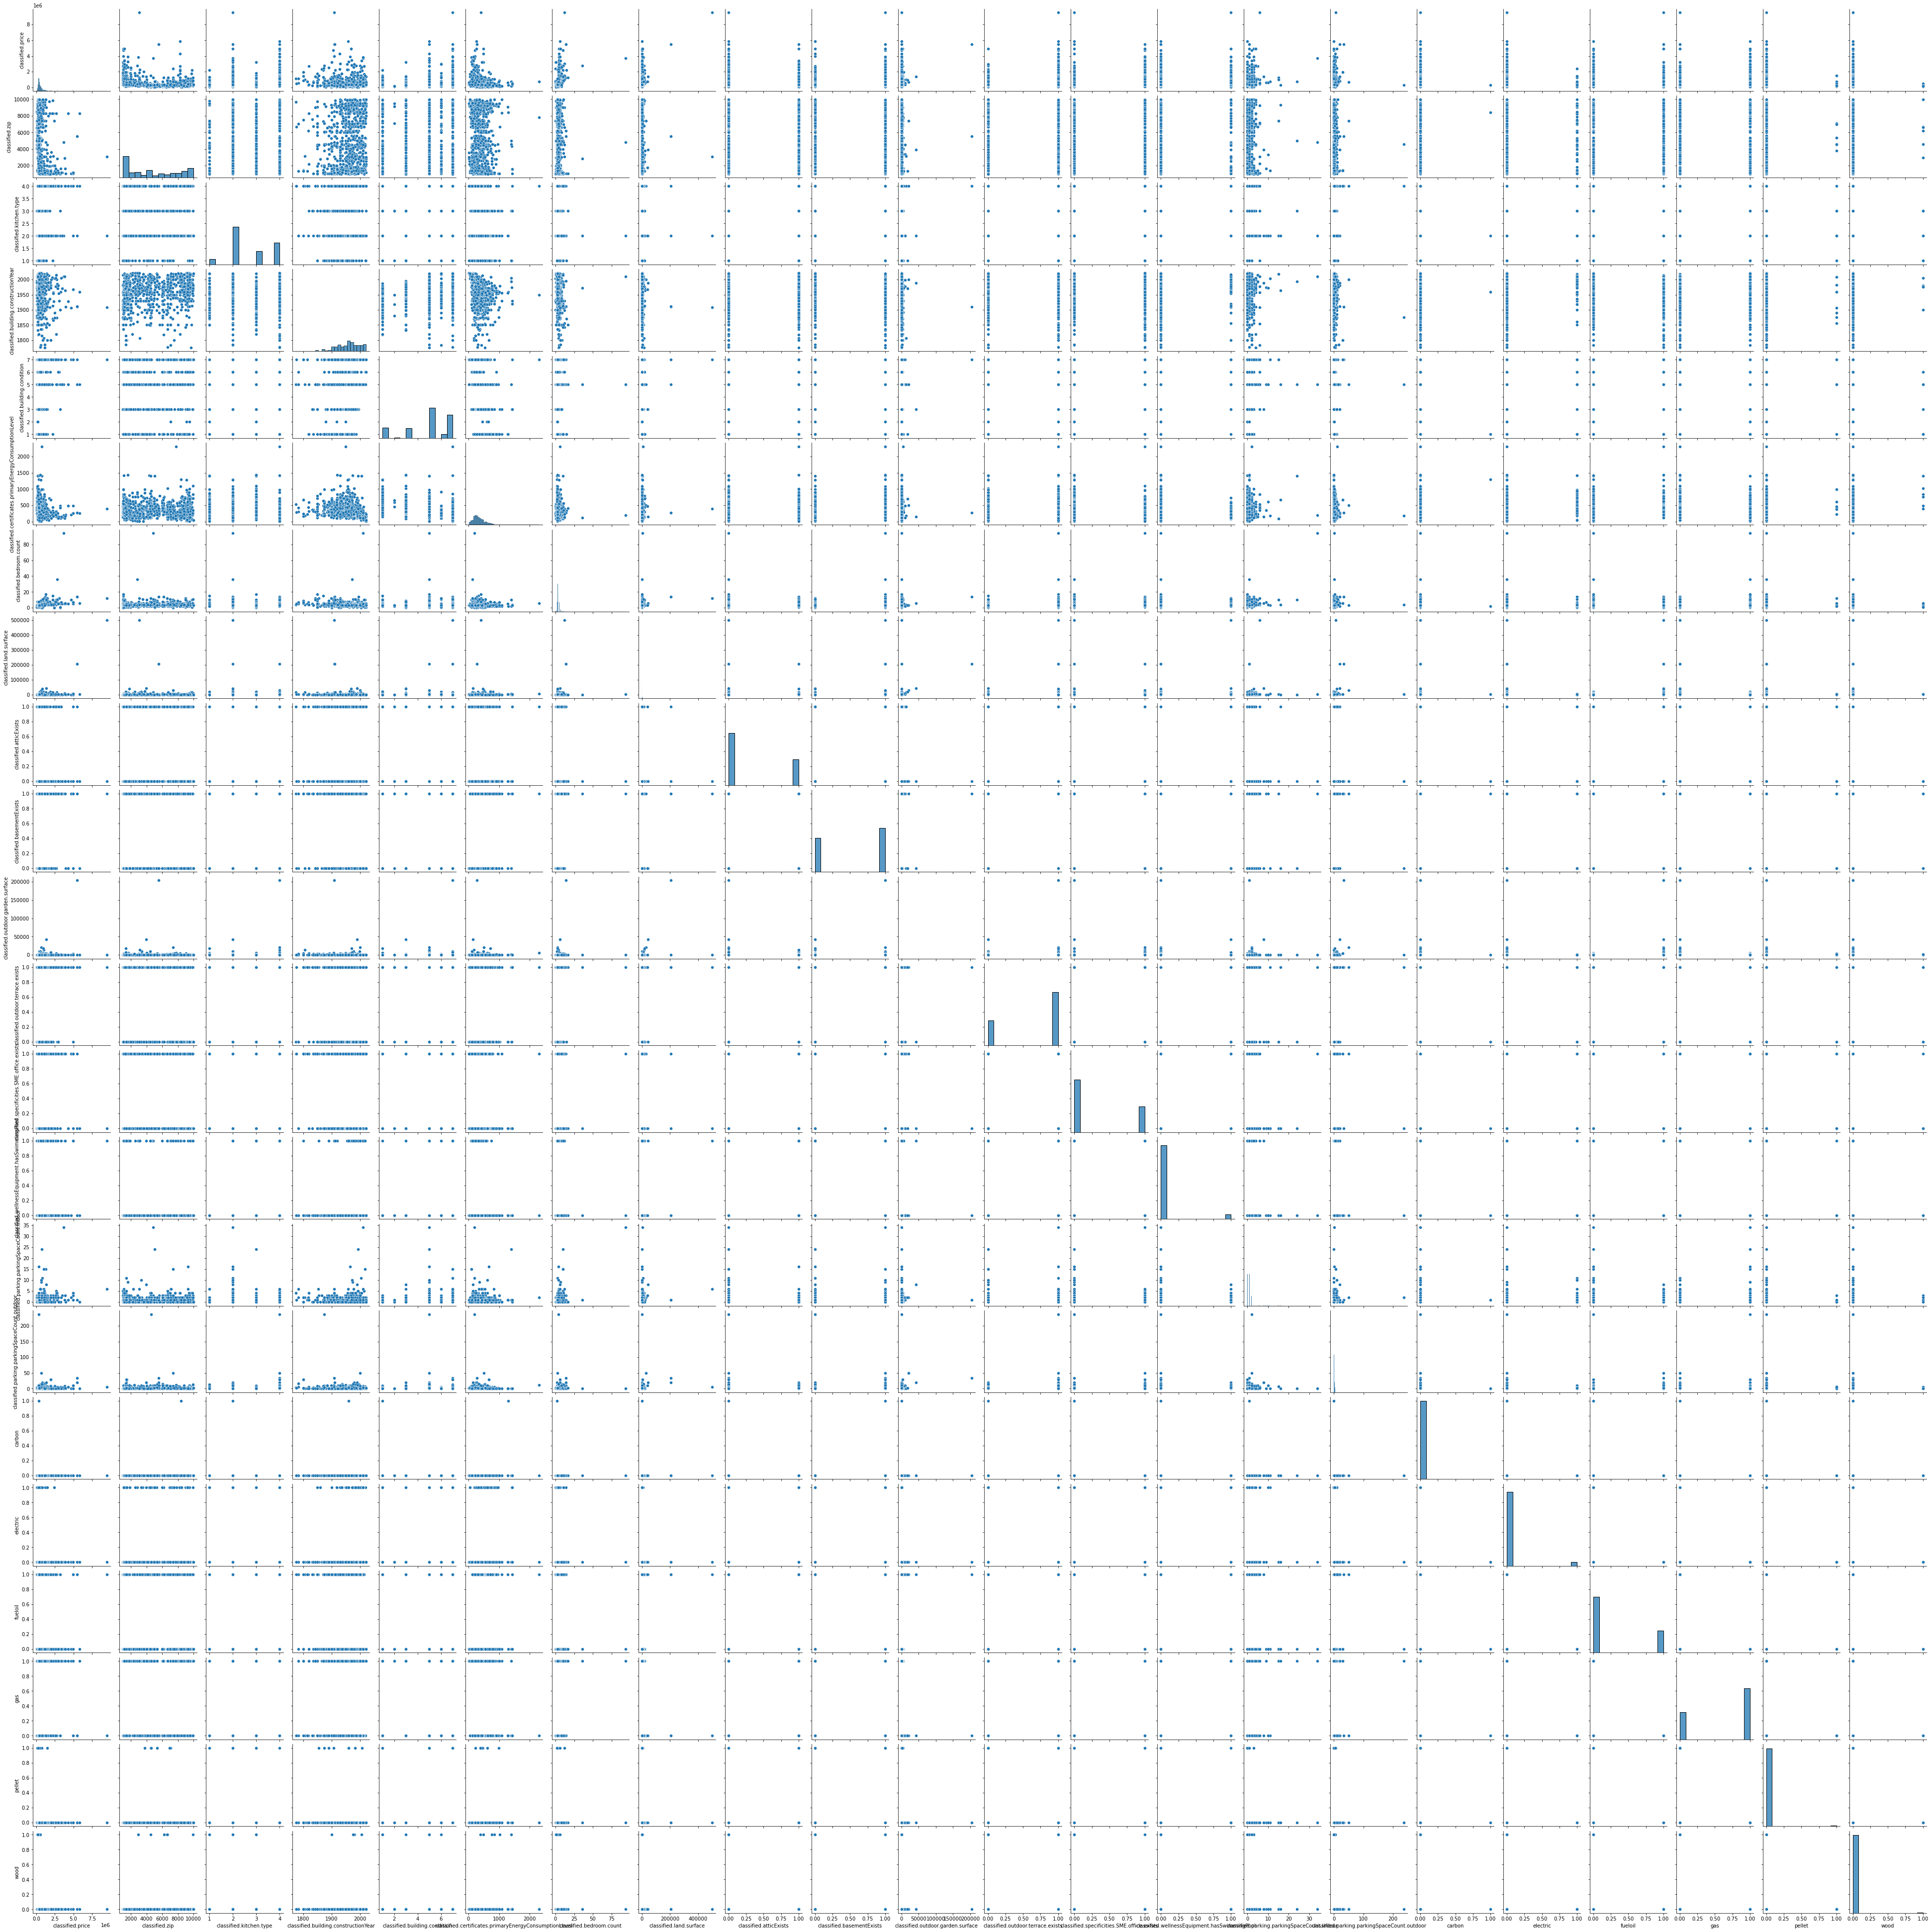

In [266]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# read data
#
df = pd.read_csv("../data/data_homes_cleaned.csv")
'''
df=df[['classified.price', 'classified.kitchen.type',
       'classified.building.constructionYear', 'classified.building.condition',
       'classified.certificates.primaryEnergyConsumptionLevel',
       'classified.bedroom.count']]

df=df[['classified.land.surface',
 'classified.parking.parkingSpaceCount.indoor',
 'classified.price',
 'classified.bedroom.count']]
'''
# prepare
 
#
X=df.drop(columns=['classified.price'])
y=df['classified.price']

'''
# How to use `sklearn` now with multiple features ? Well, it's simple, you don't change anything. `sklearn` takes care of everything for you.

1. Import `LinearRegression` from `sklearn`
2. Create a `regressor` variable and instantiate your `LinearRegression` class.
3. Train your model with `X_train` and `y_train`.
4. Display the score of your model with `X_train` and `y_train`.
5. Use the predict method of your model on your test dataset (`X_test`).
6. Display the score of your model with `X_test` and `y_test`.
'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, train_size=0.8)

from sklearn.linear_model import LinearRegression
#X_train=X_train.reshape(-1, 1)
#y_train=y_train.reshape(-1, 1)
lrg=LinearRegression().fit(X_train,y_train)
print(lrg.score(X_test,y_test))



import seaborn as sns
# Create the default pairplot
sns.pairplot(df)


Feature 0: 0.009419
Feature 1: 1.018881
Feature 2: 1.205187
Feature 3: 0.000138
Feature 4: 0.167511
Feature 5: 5.985083
Feature 6: 0.062405
Feature 7: 1.455257
Feature 8: 0.420384
Feature 9: 101.392225
Feature 10: 0.387091
Feature 11: 1.581124
Feature 12: 3.014463
Feature 13: 0.232705
Feature 14: 0.076281
Feature 15: 4.299652
Feature 16: 1.497530
Feature 17: 0.261242
Feature 18: 5.960005
Feature 19: 0.523219
Feature 20: 0.003365
Feature 21: 0.024178
Feature 22: 0.220958
Feature 23: 0.576770
Feature 24: 0.627198
Feature 25: 0.350687
Feature 26: 0.281877
Feature 27: 0.584210
Feature 28: 52.196337
Feature 29: 0.046855
Feature 30: 0.147323
Feature 31: 0.368485
Feature 32: 0.077631
Feature 33: 0.698140
Feature 34: 45.744046
Feature 35: 2.047376
Feature 36: 0.786270
Feature 37: 0.996190
Feature 38: 2.733533
Feature 39: 63.957656
Feature 40: 231.885540
Feature 41: 1.372448
Feature 42: 0.581860
Feature 43: 1.072930
Feature 44: 1.066976
Feature 45: 0.344656
Feature 46: 13.951551
Feature 47: 3.5

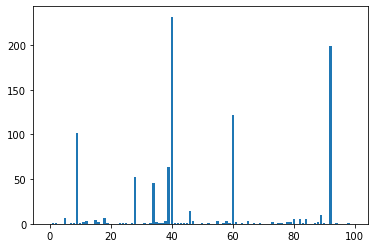

In [267]:

# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()
#X.columns

In [268]:

# evaluation of a model using all input features
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# load the dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.079


As you can see we now have 100 rows, 2 features and 1 target.

In [269]:

# evaluation of a model using 88 features chosen with mutual information
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=mutual_info_regression, k=88)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.084


**Exercise :** Create the `X` and `y` variables and define which column will be the target and which column will be the feature. 
They must be of type `numpy.ndarray`. Our variable `X` has two dimensions this time.

In [270]:

# compare different numbers of features selected using mutual information
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# define dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X.shape[1]-20, X.shape[1]+1)]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, y)
# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Best MAE: -0.010
Best Config: {'sel__k': 81}
>-50.101 with: {'sel__k': 80}
>-0.010 with: {'sel__k': 81}
>-0.010 with: {'sel__k': 82}
>-0.010 with: {'sel__k': 83}
>-0.010 with: {'sel__k': 84}
>-0.010 with: {'sel__k': 85}
>-0.010 with: {'sel__k': 86}
>-0.010 with: {'sel__k': 87}
>-0.010 with: {'sel__k': 88}
>-0.010 with: {'sel__k': 89}
>-0.010 with: {'sel__k': 90}
>-0.011 with: {'sel__k': 91}
>-0.011 with: {'sel__k': 92}
>-0.011 with: {'sel__k': 93}
>-0.011 with: {'sel__k': 94}
>-0.011 with: {'sel__k': 95}
>-0.011 with: {'sel__k': 96}
>-0.011 with: {'sel__k': 97}
>-0.011 with: {'sel__k': 98}
>-0.011 with: {'sel__k': 99}
>-0.011 with: {'sel__k': 100}


In [4]:
import numpy as np

X=df[['x_1','x_2']]
#X
y=df[['y']]
#y

X=np.array(X)
y=np.array(y)



### Relationship between variables

To represent a dataset that has two features, we can use 3D visualization.

**Exercise :** Use a 3D matplotlib (or other) graph to view the dataset. 

In [5]:
X[:,0]

array([ 1.05445173, -0.36274117, -0.85409574,  1.3263859 , -0.4615846 ,
        1.94362119, -1.60205766, -0.40178094, -0.97727788,  0.37816252,
       -0.30230275, -0.74745481, -0.18718385,  0.31872765, -1.53624369,
        0.40015721, -0.82643854, -0.74216502,  0.70657317,  0.90082649,
       -0.57884966, -0.20829876,  0.68159452,  0.8024564 ,  0.77749036,
       -1.5447711 ,  0.96939671,  0.67643329,  1.78587049,  1.5430146 ,
        0.05616534, -0.21274028, -0.35955316, -1.23482582,  0.15634897,
        0.4105985 , -0.15501009,  1.20237985,  0.40198936, -1.07993151,
        0.92220667, -0.68954978, -0.17154633,  0.08755124,  1.89588918,
       -0.66347829,  1.84926373,  0.33367433, -1.37495129,  1.46935877,
        0.01747916, -1.18063218,  0.26705087,  1.11701629,  1.45427351,
        2.2408932 , -0.14963454,  0.90604466, -1.1680935 , -0.65102559,
       -1.98079647, -0.4380743 ,  0.84436298,  1.22244507,  0.63503144,
        0.3869025 , -0.20515826,  0.12898291,  1.33652795,  1.95

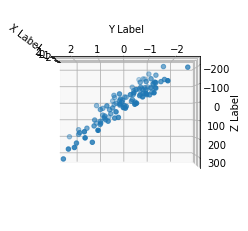

In [6]:
import matplotlib.pyplot as plt


j=180
k=180

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], y)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.view_init(j,k)
    

    

If you change the camera angle, you should come across something that looks like this: 
<img src="./assets/3dplot.png" />

This appears to be a positive linear correlation. What do you say?  


If our dataset has more than two dimensions, then we won't be able to display it in 3D. Unfortunately for us, the human being can only perceive 3 dimensions. In this case, we will have no other choice than to display one scatter plot per variable.

And it is there that we realize that the linear regression may be very simple, as soon as we go beyond 3 dimensions, the human being will hardly be able to visualize all the data while the machines are doing very well.

**Exercise :** Create a scatter plot for each variable with respect to the target. You may use  `plt.tight_layout()` after plotting if the graph is too cramped.

Text(0, 0.5, 'Y Label')

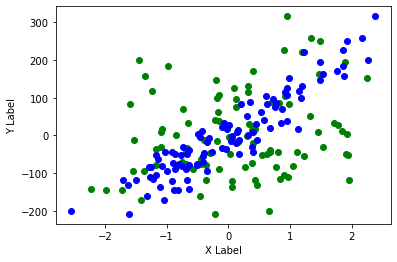

In [7]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X[:,0], y,color='green')
ax.scatter(X[:,1], y,color='blue')
plt.xlabel('X Label')
plt.ylabel('Y Label')
#plt.tight_layout()


**Exercise :** Show correlation coefficients. 

In [40]:
from scipy import stats as sc
X0=X[:,0]
X1=X[:,1]

X0=X0.reshape(-1,1)
X1=X1.reshape(-1,1)
y
#print(type(X0),type(X1))
print(sc.stats.spearmanr(X0, y)) 
print(sc.stats.spearmanr(X1, y))


SpearmanrResult(correlation=0.2131413141314131, pvalue=0.033242149992682116)
SpearmanrResult(correlation=0.9236483648364835, pvalue=1.3159076055708707e-42)


### Split the dataset

You now know the process!

**Exercise :** Import `train_test_split` from `sklearn` and split the dataset and create the variables `X_train`, `X_test`, `y_train`, `y_test`.

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=33, test_size=0.2)

##  Load and fit the model (with Sklearn)

In [46]:
from sklearn.linear_model import LinearRegression
#X_train=X_train.reshape(-1, 1)
#y_train=y_train.reshape(-1, 1)
regressor=LinearRegression().fit(X_train,y_train)


In [47]:
regressor.score(X_train, y_train)

0.9307521675787522

In [50]:
ypred=regressor.predict(X_test)
X_test
ypred

array([[ -75.1895544 ],
       [ 256.41021968],
       [  94.7652187 ],
       [-127.35412047],
       [-142.68099536],
       [ 122.27849054],
       [  16.12079053],
       [  86.48069328],
       [   5.23380785],
       [ 225.35462338],
       [  43.4111306 ],
       [-101.06577175],
       [  64.07865113],
       [ -64.35542839],
       [-100.18975527],
       [  79.24982888],
       [-144.54570881],
       [ -33.00053604],
       [-128.6018231 ],
       [-125.0971861 ]])

Text(0, 0.5, 'Y Label')

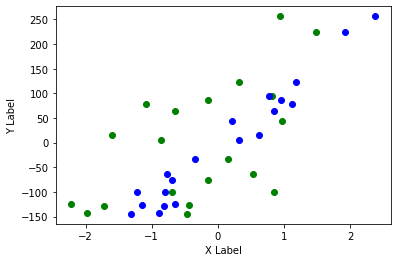

In [51]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_test[:,0], ypred,color='green')
ax.scatter(X_test[:,1], ypred,color='blue')
plt.xlabel('X Label')
plt.ylabel('Y Label')
#plt.tight_layout()

And voilà !

## From Scratch 
You will see that with matrices, it doesn't change much in the way of proceeding. Matrix writing, moreover, remains the same as simple regression. 

### Transform to matrix

$$
\\ Y = X \cdot \theta \\
$$
The $Y$ vector is the same too
$$ Y =
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
y^{(3)}\\
... \\
y^{(m)}\\
\end{bmatrix}
$$

The $X$ matrix will have as many dimensions as there are features +1  (n+1)

$$ X =
\begin{bmatrix}
x^{(1)}_1, x^{(1)}_2, ..., x^{(m)}_{n}, 1\\
x^{(2)}_1, x^{(2)}_2, ..., x^{(m)}_{n}, 1\\
x^{(3)}_1, x^{(3)}_2, ..., x^{(m)}_{n}, 1\\
x^{(m)}_1,x^{(m)}_2, ..., x^{(m)}_{n}, 1\\
\end{bmatrix}
$$

The theta vector will have as many lines as there are parameters +1 (for the constant). 
$$ \theta =
\begin{bmatrix}
a\\
b\\
c\\
... \\
\end{bmatrix}
$$

For our case with our dataset, we can write it like this: 

$$
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
y^{(3)}\\
... \\
y^{(m)}\\
\end{bmatrix}
=
\begin{bmatrix}
x^{(1)}_1, x^{(1)}_2, 1\\
x^{(2)}_1, x^{(2)}_2, 1\\
x^{(3)}_1, x^{(3)}_2, 1\\
x^{(m)}_1,x^{(m)}_2,  1\\
\end{bmatrix}
\cdot
\begin{bmatrix}
a\\
b\\
c\\
\end{bmatrix}
$$

**Exercise :** Create a variable `X` which contains a matrix of shape `(100,3)` with two column's filled with values of our dataframe and then another one with 1's.

In [80]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/data_multi.csv')

X=np.array(df)
X[:,2]=1
X[0]


array([ 1.05445173, -1.07075262,  1.        ])

**Exercise :** Check that your matrix is of shape `(100,3)`. 

In [81]:
X.shape

(100, 3)

**Exercise :** Create the theta vector with three random values. Your vector must be of shape 
`(3,1)`.

In [82]:
theta=np.array([[2],
                [4],
                [6]])

## Create and fit the model
### Define your model

**Exercise :** Create a `model` function that receives as parameter `X` and `theta`. The function must return the computed predictions `y_pred`. This is exactly the same model as last time. 

In [83]:
def model (X, theta):
    y_pred=X.dot(theta)
    return y_pred

### Cost function

Well we have the model, the $\theta$ vector, the $X$ matrix. What are we missing? The cost function of course!
And you know what? This too is exactly the same MSE function from last time. 

$$MSE(\theta) = \frac {1}{2m}  \sum (X \cdot \theta - Y)^2$$

**Exercise :** Create a MSE function that receives as parameters `X`, `y` and `theta` using the example above.

In [84]:
def MSE(X,y,theta):
    m=len(X)
    M=(sum((X.dot(theta) - y)**2)) / (2*m) 
    return M


### Gradient descent
It's time to find the minimum of our function. Well again, nothing changes compared to the last time. 

$$ \frac {\partial MSE(\theta) }{\partial \theta}  = \frac {1}{m} X^T \cdot (X \cdot \theta - Y)$$

**Exercise :** Create a `grad` function that receives as parameter `X`, `y`, `theta`.

In [85]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

**Exercise :**

1. Create a `gradient_descent` function that receives as parameter `X`, `y`, `theta`, `learning_rate`, `n_iterations`.
2. In the function, create a variable `cost_history` with a matrix filled with 0 and which has a length of `n_iterations`. We will use it to display the histogram of the model learning process.
3. Create a loop that iterates up to `n_iterations`.
4. In the loop, update `theta` with the formula of the gradient descent (the example above).
5. In the loop, update `cost_history[i]` with the values of `MSE(X,y,theta)`.
6. return `theta` and `cost_history`.

In [86]:
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    cost_history=np.zeros(n_iterations).reshape(n_iterations,1)
    #print(cost_history)
    for lp in range(n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[lp] = MSE(X,y,theta)
        #print("###",cost_history[lp])
    return theta,cost_history

### Train your model 

**Exercise :** Create variables `n_iterations` and `learning_rate`.

In [87]:
n_iterations=1000
learning_rate=0.01

**Exercise:** Create variables `theta_final`, `cost_history` and call `gradient_descent()`.

In [88]:
theta_final,cost_history=gradient_descent(X,y,theta,learning_rate,n_iterations)

In [89]:
theta_final
#cost_history

array([[27.59057925],
       [99.50456686],
       [-1.53933749]])

**Exercise :** 
Create a `predictions` variable that contains `model(X, theta_final)`.



In [90]:
predictions=model(X, theta_final)

**Exercise :** Plot your predictions in 3D and the true values of the dataset.

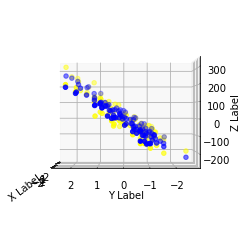

In [96]:
import matplotlib.pyplot as plt

j=0
k=180

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], y,color='yellow')

ax.scatter(X[:,0], X[:,1], predictions,color='blue')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.view_init(j,k)

**Exercise :** Plot `cost_history`.

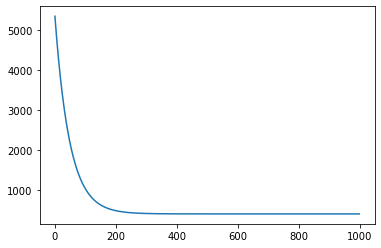

In [97]:
plt.plot(cost_history)

### Evaluation

In [99]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [100]:
coef_determination(y, predictions)

0.9320499569964104

### Congratulations !

You are now able to create a multiple variable regression model from scratch, well, from the matrix!

<img src="https://media.giphy.com/media/W9lzJDwciz6bS/giphy.gif">